In [1]:
### importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
### importing Data processing functions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [3]:
### importing various Classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier , AdaBoostClassifier , GradientBoostingClassifier,RandomForestClassifier

In [4]:
#Model evaluation tools
from sklearn import metrics
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
dataset=pd.read_csv('hn1_vaccine.csv')

In [8]:
dataset.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0.0


In [ ]:
dataset.shape

(26707, 34)

In [ ]:
dataset.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

<Axes: >

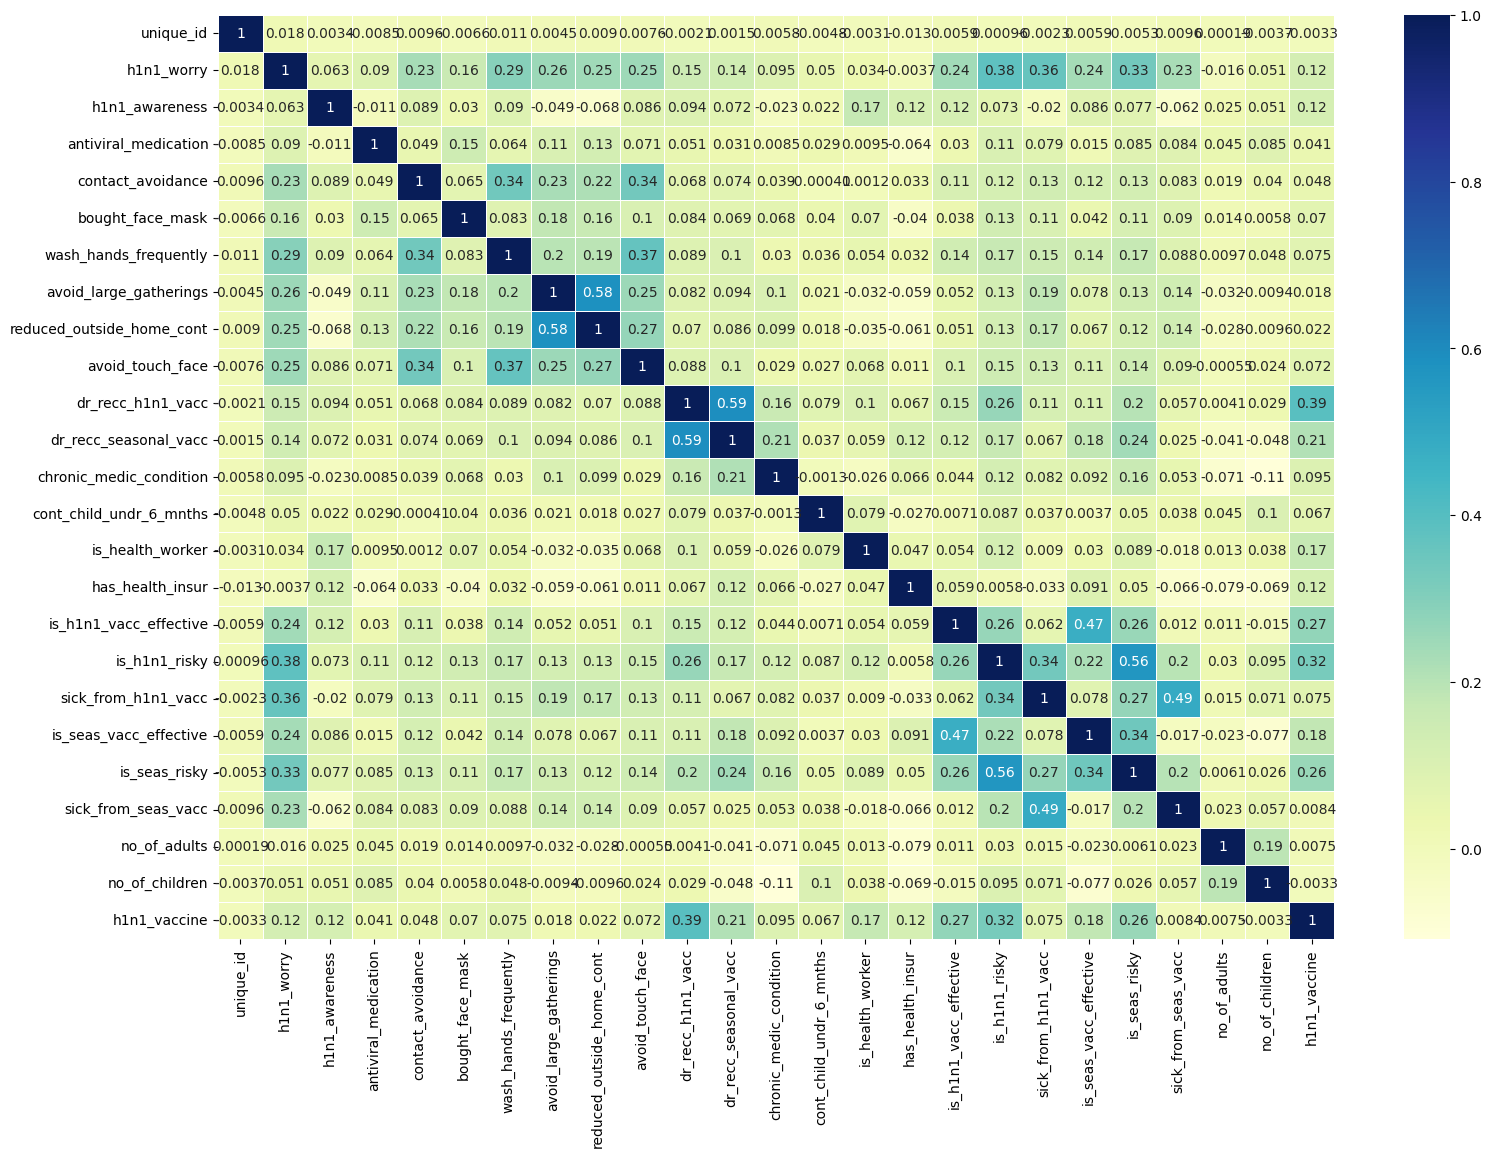

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(dataset.corr(),annot=True,linewidths=.5,cmap="YlGnBu")

<Axes: >

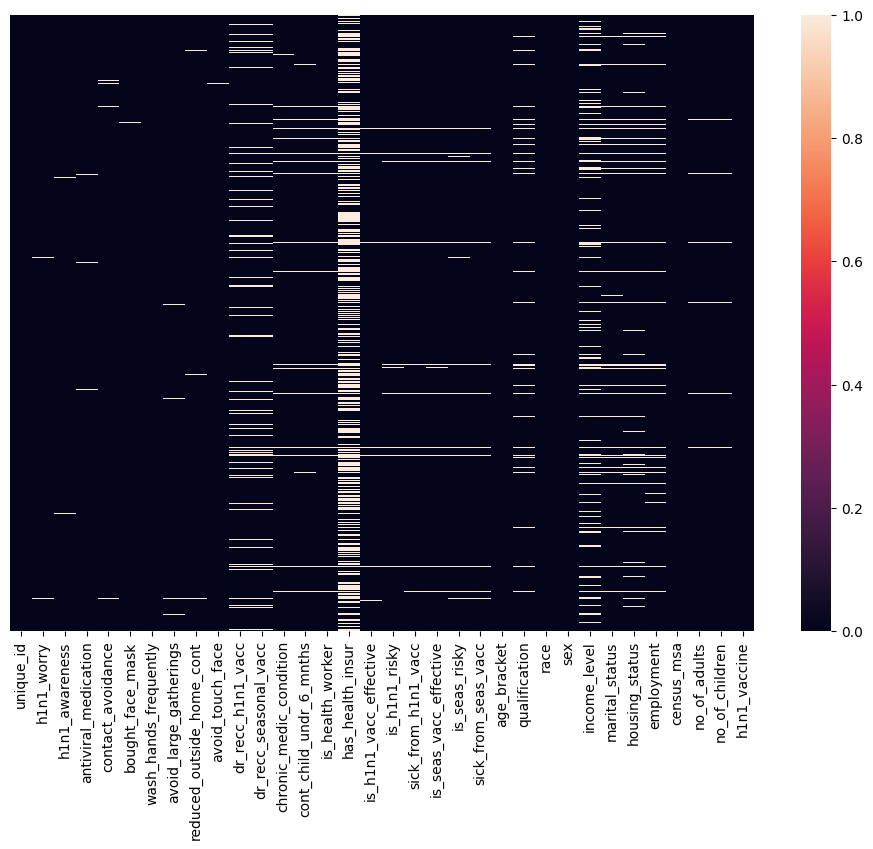

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.isnull(),yticklabels=False)

In [ ]:
dataset.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [ ]:
dataset.drop(['unique_id','has_health_insur'],axis=1,inplace=True)
dataset.isnull().sum()

h1n1_worry                     92
h1n1_awareness                116
antiviral_medication           71
contact_avoidance             208
bought_face_mask               19
wash_hands_frequently          42
avoid_large_gatherings         87
reduced_outside_home_cont      82
avoid_touch_face              128
dr_recc_h1n1_vacc            2160
dr_recc_seasonal_vacc        2160
chronic_medic_condition       971
cont_child_undr_6_mnths       820
is_health_worker              804
is_h1n1_vacc_effective        391
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment                   1463
census_msa                      0
no_of_adults  

In [ ]:
dataset.shape

(26707, 32)

In [ ]:
to_be_replaced=['h1n1_worry','h1n1_awareness','antiviral_medication','contact_avoidance','bought_face_mask','wash_hands_frequently','avoid_large_gatherings','reduced_outside_home_cont','avoid_touch_face','dr_recc_h1n1_vacc','dr_recc_seasonal_vacc','chronic_medic_condition','cont_child_undr_6_mnths','is_health_worker','is_h1n1_vacc_effective','is_h1n1_risky','sick_from_h1n1_vacc','is_seas_vacc_effective','is_seas_risky','sick_from_seas_vacc','no_of_adults','no_of_children']
for x in to_be_replaced:
  dataset[x].fillna(dataset[x].median(),inplace=True)

In [ ]:
to_be_replaced=['qualification','income_level','marital_status','housing_status','employment']
for x in to_be_replaced:
  dataset[x].fillna(dataset[x].mode()[0],inplace=True)

In [ ]:
dataset.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: i

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

In [ ]:
dataset.describe()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,0.202494,...,0.108548,3.852810,2.337589,2.352380,4.025536,2.705321,2.115737,0.887558,0.529599,0.212454
std,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,0.401866,...,0.311077,1.000195,1.276825,1.353339,1.077131,1.375216,1.319585,0.749980,0.925264,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,5.000000,4.000000,4.000000,5.000000,4.000000,2.000000,1.000000,1.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [ ]:
to_be_trnasformed=['age_bracket','qualification','race','sex','income_level','marital_status','housing_status','employment','census_msa']
for x in to_be_trnasformed:
  dataset[x] = le.fit_transform(dataset[x])

In [ ]:
dataset.describe()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,0.202494,...,2.570300,0.406223,0.456959,0.439735,0.222002,0.491894,0.833489,0.887558,0.529599,0.212454
std,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,0.401866,...,0.923226,0.491136,0.670920,0.496364,0.415600,0.598964,0.823313,0.749980,0.925264,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000


In [ ]:
x=dataset.drop(['h1n1_vaccine','no_of_adults','no_of_children','sick_from_seas_vacc'],axis=1)
y=dataset['h1n1_vaccine']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
def print_confusion_matrix(y_test,y_predict):
  print("\nConfusion Matrix:")
  cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])
  df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],columns = [i for i in ["No","Yes"]])
  plt.figure(figsize = (7,5))
  sns.heatmap(df_cm, annot=True ,fmt='g')

training set score:  0.8362576227666632
test set score:  0.830650193435667

Confusion Matrix:


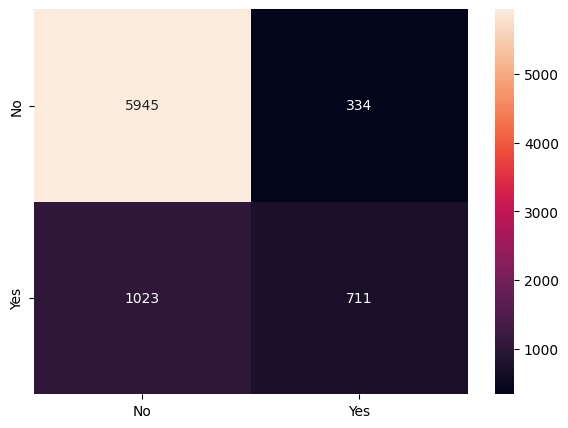

In [ ]:
model=LogisticRegression(solver="liblinear")
model.fit(x_train,y_train)
print("training set score: ",model.score(x_train,y_train))
print("test set score: ",model.score(x_test,y_test))
print_confusion_matrix(y_test,model.predict(x_test))

training set score:  0.8203166791483899
test set score:  0.8170472981405217

Confusion Matrix:


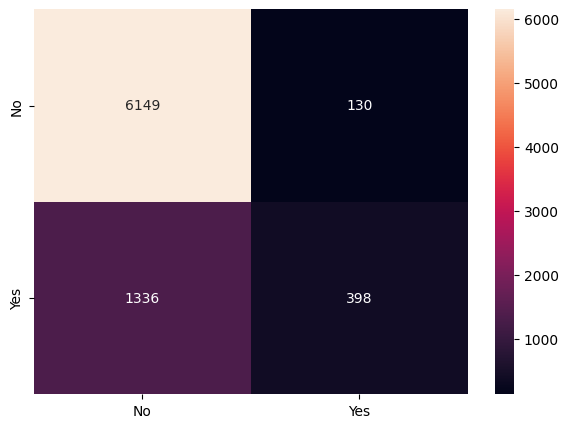

In [ ]:
model=KNeighborsClassifier(100)
model.fit(x_train,y_train)
print("training set score: ",model.score(x_train,y_train))
print("test set score: ",model.score(x_test,y_test))
print_confusion_matrix(y_test,model.predict(x_test))

training set score:  0.827538247566064
test set score:  0.823786347185823

Confusion Matrix:


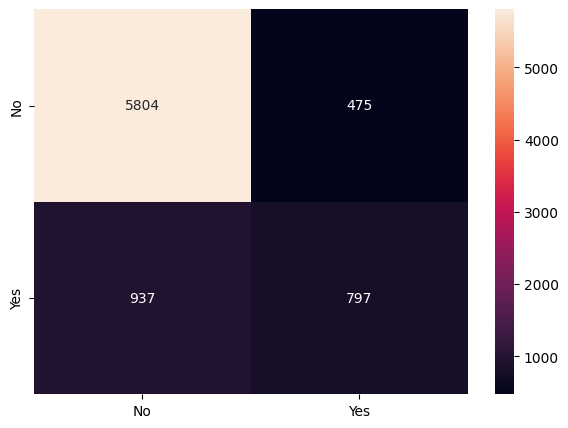

In [ ]:
model=DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=0)
model.fit(x_train,y_train)
print("training set score: ",model.score(x_train,y_train))
print("test set score: ",model.score(x_test,y_test))
print_confusion_matrix(y_test,model.predict(x_test))

training set score:  0.8311757783245961
test set score:  0.8296518157993261

Confusion Matrix:


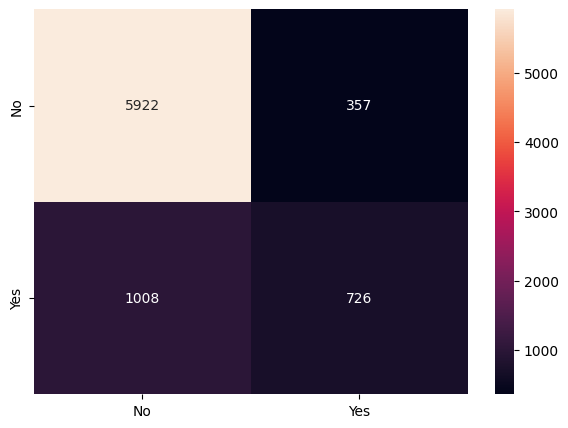

In [ ]:
model = BaggingClassifier( n_estimators=150,base_estimator=model,random_state=0)
model = model.fit(x_train,y_train)
print("training set score: ",model.score(x_train,y_train))
print("test set score: ",model.score(x_test,y_test))
print_confusion_matrix(y_test,model.predict(x_test))

training set score:  0.837113512356906
test set score:  0.8302758018220392

Confusion Matrix:


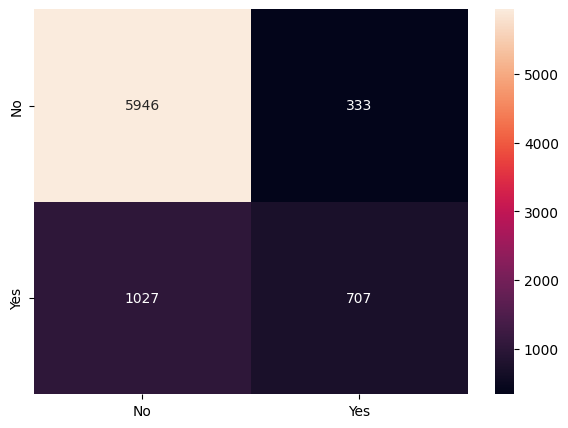

In [ ]:
model=AdaBoostClassifier()
model.fit(x_train,y_train)
print("training set score: ",model.score(x_train,y_train))
print("test set score: ",model.score(x_test,y_test))
print_confusion_matrix(y_test,model.predict(x_test))

training set score:  0.8439071359794587
test set score:  0.8361412704355422

Confusion Matrix:


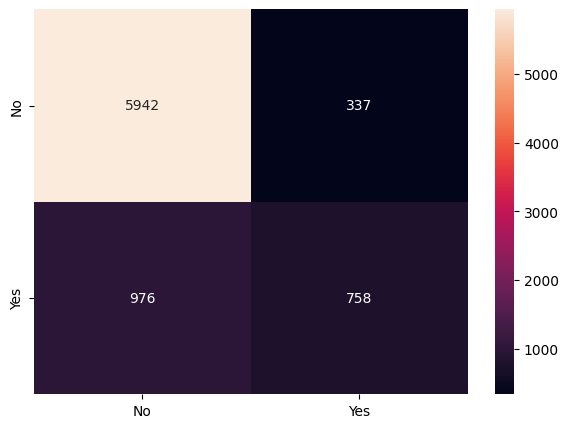

In [ ]:
model=GradientBoostingClassifier()
model.fit(x_train,y_train)
print("training set score: ",model.score(x_train,y_train))
print("test set score: ",model.score(x_test,y_test))
print_confusion_matrix(y_test,model.predict(x_test))

training set score:  0.8314967369209372
test set score:  0.8274054661175589

Confusion Matrix:


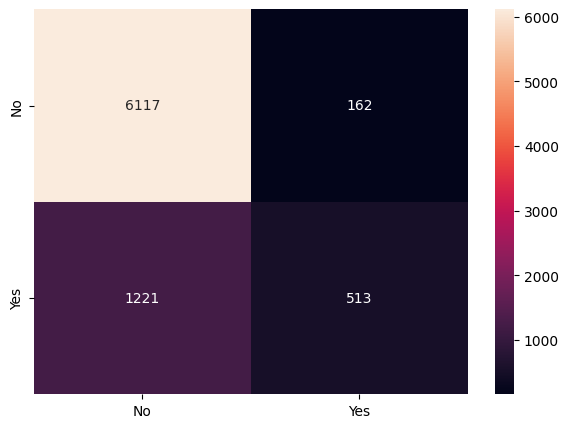

In [ ]:
model=RandomForestClassifier(max_depth=5)
model.fit(x_train,y_train)
print("training set score: ",model.score(x_train,y_train))
print("test set score: ",model.score(x_test,y_test))
print_confusion_matrix(y_test,model.predict(x_test))